TextRank algorithm: https://www.youtube.com/watch?v=XO97Uon83Os&list=PLM8wYQRetTxCCURc1zaoxo9pTsoov3ipY&index=9  
Markov Chains: https://www.youtube.com/watch?v=i3AkTO9HLXo

In [1]:
# from gensim.summarization.summarizer import summarize
# from gensim.summarization import keywords

In [2]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

In [5]:
import numpy as np
from nltk.corpus import stopwords

In [6]:
# open 100 dimension GloVe word vectors from file
word_embeddings = {}
with open('/content/drive/MyDrive/2020 WINTER PROJ/util/glove.6B.100d.txt', encoding='utf-8') as f:
  for line in f:
    splits = line.split()
    key = splits[0]
    value = np.array(splits[1:], dtype='float32')
    word_embeddings[key] = value

In [7]:
# we have 400000 word vectors
print(len(word_embeddings))

400000


TextRank example

In [8]:
words = ['expensive', 'price', 'overcharge', 'design', 'color', 'shape']
vectors = [word_embeddings.get(word, np.zeros([100])) for word in words]

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xy = pca.fit_transform(vectors)
x = xy[:,0]
y = xy[:,1]

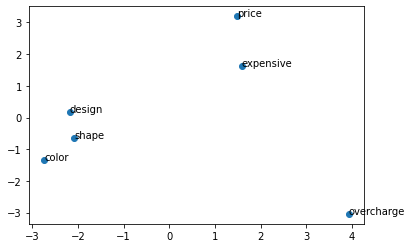

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
for i, word in enumerate(words):
  plt.annotate(word, xy=(x[i], y[i]))

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vectors, vectors)

In [15]:
similarity_matrix

array([[ 1.0000001 ,  0.51585984,  0.1336875 ,  0.45925802,  0.29452193,
         0.35939747],
       [ 0.51585984,  1.        ,  0.05526743,  0.37996674,  0.33547384,
         0.3422405 ],
       [ 0.1336875 ,  0.05526743,  0.99999994, -0.13499899, -0.15776084,
        -0.22385436],
       [ 0.45925802,  0.37996674, -0.13499899,  0.99999994,  0.5345217 ,
         0.5837458 ],
       [ 0.29452193,  0.33547384, -0.15776084,  0.5345217 ,  1.0000001 ,
         0.57407343],
       [ 0.35939747,  0.3422405 , -0.22385436,  0.5837458 ,  0.57407343,
         0.9999998 ]], dtype=float32)

In [16]:
sim_mat = np.zeros([len(vectors), len(vectors)])
for i in range(len(vectors)):
  for j in range(len(vectors)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(vectors[i].reshape(1,100), vectors[j].reshape(1,100))[0,0]

In [17]:
sim_mat

array([[ 0.        ,  0.5158599 ,  0.13368751,  0.45925802,  0.29452199,
         0.35939747],
       [ 0.5158599 ,  0.        ,  0.05526742,  0.37996671,  0.33547384,
         0.34224054],
       [ 0.13368751,  0.05526742,  0.        , -0.13499901, -0.15776084,
        -0.22385433],
       [ 0.45925802,  0.37996671, -0.13499901,  0.        ,  0.53452164,
         0.58374572],
       [ 0.29452199,  0.33547384, -0.15776084,  0.53452164,  0.        ,
         0.57407349],
       [ 0.35939747,  0.34224054, -0.22385433,  0.58374572,  0.57407349,
         0.        ]])

In [18]:
# To conduct pagerank, similarity matrix should have zero diagonal(?)
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [19]:
scores

{0: 0.19713735919638659,
 1: 0.18760107918884625,
 2: -0.011756339114890643,
 3: 0.22157507344643979,
 4: 0.19811985412855385,
 5: 0.20732297315466403}

In [20]:
ranks = sorted(scores, key=(lambda x:scores[x]), reverse=True)

In [21]:
ranks

[3, 5, 4, 0, 1, 2]

In [22]:
aspect = words[ranks[0]]

In [23]:
aspect

'design'

Visualize a sentence

In [24]:
sentence = "bro why is the car ride for uber so expensive"
words = sentence.split()
vectors = [word_embeddings.get(word, np.zeros([100])) for word in words]

In [25]:
xy = pca.fit_transform(vectors)
x = xy[:,0]
y = xy[:,1]

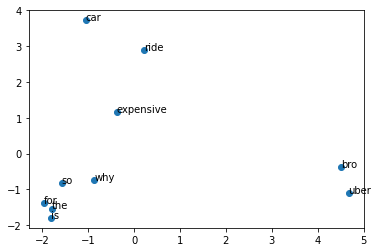

In [26]:
plt.scatter(x, y)
for i, word in enumerate(words):
  plt.annotate(word, xy=(x[i], y[i]))

Process data

In [27]:
keyword = 'uber'
sentence = "bro why is the car ride for uber so expensive"

stop_words = stopwords.words('english')
words = [word for word in sentence.split() if word not in stop_words]

In [28]:
sentences = ["bro why is the car ride for uber so expensive",
             "What is the point of having your app if your drivers call us to ask the location just to bloody cancel. Horrible service from Uber"]

In [29]:
sentences = ["expensive"]